In [4]:
import os
import google.generativeai as genai
import textwrap
from IPython.display import display
from IPython.display import Markdown

# turn response into markdown content
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

key = os.getenv('gemini_pro')

In [6]:
txt_model = genai.GenerativeModel('gemini-pro')
label = "Tomato leaf mosaic virus"
prompt = f"I want the information on {label}. If it is a disease, then provide remedies to cure the disease."
print(prompt)
#response = txt_model.generate_content(prompt)

#print(response.text)

I want the information on Tomato leaf mosaic virus. If it is a disease, then provide remedies to cure the disease.


In [21]:
# get the yolov5 path and weights path from config 
import json
with open('config.json') as f:
    config = json.load(f)
yolov5_path = config['yolov5']["yolov5"]
weights_path = config["yolov5"]['weights']

In [22]:
import subprocess

def run_detection(image_path, weights_path):
    # Change directory to yolov5 folder
    os.chdir(yolov5_path)

    command = [
        'python', 'detect.py',
        '--source', image_path,
        '--weights', weights_path,
        '--img', '416',
        '--conf', '0.5',
        '--iou', '0.4',
        '--save-txt',
        '--save-conf'
    ]
    #subprocess.run(command)
    # Run the command and capture output
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    # Decode output bytes to strings and display
    print("Standard output and errors:")
    print(stdout.decode())
    print(stderr.decode())

# Example usage
image_path = 'C:\\Users\\kruth\\Datasets\\PlantDoc2\\test\\images1\\0796.47southrust.jpg'

In [23]:
run_detection(image_path, weights_path)

Standard output and errors:

detect: weights=['C:\\Users\\kruth\\leaf_disease_detection\\yolov5\\runs\\train\\leaf_detect35\\weights\\best.pt'], source=C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-286-ge3bf5939 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7088338 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg: 256x416 1 Corn rust leaf, 105.5ms
Speed: 1.0ms pre-process, 105.5ms inference, 90.9ms NM

In [54]:
class_dict = {'Strawberry leaf': 0, 'Peach leaf': 1, 'Tomato leaf mosaic virus': 2, 'Soyabean leaf': 3, 'grape leaf': 4, 'Tomato leaf bacterial spot': 5, 'Bell_pepper leaf': 6, 'Tomato leaf': 7, 'Apple leaf': 8, 'Apple Scab Leaf': 9, 'Potato leaf': 10, 'Potato leaf early blight': 11, 'Tomato leaf yellow virus': 12, 'Tomato Septoria leaf spot': 13, 'Corn leaf blight': 14, 'Potato leaf late blight': 15, 'Bell_pepper leaf spot': 16, 'Squash Powdery mildew leaf': 17, 'Tomato two spotted spider mites leaf': 18, 'Tomato mold leaf': 19, 'Cherry leaf': 20, 'Tomato leaf late blight': 21, 'Apple rust leaf': 22, 'Tomato Early blight leaf': 23, 'Corn Gray leaf spot': 24, 'Blueberry leaf': 25, 'Corn rust leaf': 26, 'grape leaf black rot': 27, 'Raspberry leaf': 28}

Detection successful!
Class index: 26
Class name: Corn rust leaf


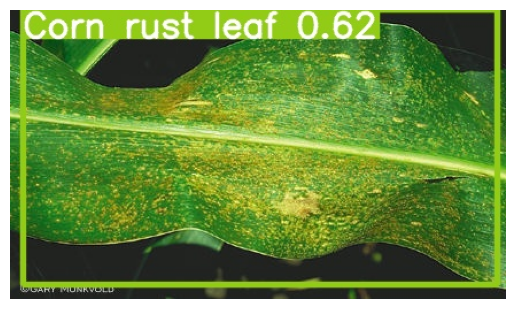

In [63]:
import os
from PIL import Image
import matplotlib.pyplot as plt


def check_latest_detection( class_dict=class_dict):

    # Change directory to yolov5 folder
    os.chdir(yolov5_path)
    detect_folder = os.path.join('runs', 'detect')

    # Get the list of subdirectories in the detect folder
    subdirs = [d for d in os.listdir(detect_folder) if os.path.isdir(os.path.join(detect_folder, d))]

    # Sort subdirectories by creation time to get the latest one
    latest_folder = sorted(subdirs, key=lambda x: os.path.getctime(os.path.join(detect_folder, x)), reverse=True)[0]
    
    # Get the path of the latest detection folder
    latest_folder_path = os.path.join(detect_folder, latest_folder)
    labels_folder_path = os.path.join(latest_folder_path, "labels")

    # Get the image path
    image_path = os.path.join(latest_folder_path, os.listdir(latest_folder_path)[0])
    # Display the image using PIL
    image = Image.open(image_path)
    # display the image using plt
    plt.imshow(image)
    plt.axis('off')

    # Check if labels folder exists
    if os.path.exists(labels_folder_path):
        print("Detection successful!")

        # Get the path of the labels file
        labels_file_path = os.path.join(labels_folder_path, os.listdir(labels_folder_path)[0])
        # Read the content of the labels file
        with open(labels_file_path, 'r') as file:
            content = file.readline()
        # Extract the class index from the content
        class_index = content.split()[0]
        print("Class index:", class_index)

        # Get the class name from the class index
        class_name = list(class_dict.keys())[list(class_dict.values()).index(int(class_index))]
        print("Class name:", class_name)
        return image, class_name
    else:
        print("Labels folder does not exist in the latest detection folder.")
        return image, None

# Example usage:
image, class_name = check_latest_detection()

In [ ]:
txt_model = genai.GenerativeModel('gemini-pro')
label = "Tomato leaf mosaic virus"
prompt = f"I want the information on {label}. If it is a disease, then provide remedies to cure the disease."
print(prompt)
#response = txt_model.generate_content(prompt)

#print(response.text)

In [ ]:
# turn response into markdown content
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [66]:
# function to input the class name if exists and get the response
def get_response(class_name, image):
    if class_name:
        model = genai.GenerativeModel('gemini-pro')
        prompt = f"I want the information on {class_name}. If it is a disease, then provide remedies to cure the disease."
        response = model.generate_content(prompt)
        to_markdown(response.text)
        print(response.text)
    else:
        # get the iamge and get response from gemini vision pro model
        model = genai.GenerativeModel('gemini-vision-pro')
        response = model.generate_content(["If it is a disease, then provide remedies to cure the disease.", image])
        response.resolve()
        to_markdown(response.text)
        print(response.text)

In [68]:
# Example usage
#get_response(class_name, image)

In [ ]:
import os
import google.generativeai as genai
import textwrap
from IPython.display import display
from IPython.display import Markdown
import json
import subprocess

In [71]:
os.chdir("..")

In [85]:
# combine all the functions into one class

class Backend:
    def __init__(self, img_path):
        self.img_path = img_path
        with open('config.json') as f:
            self.config = json.load(f)
        self.yolov5_path = self.config['yolov5']["yolov5"]
        self.weights_path = self.config["yolov5"]['weights']
        self.class_dict = {'Strawberry leaf': 0, 'Peach leaf': 1, 'Tomato leaf mosaic virus': 2, 'Soyabean leaf': 3, 'grape leaf': 4, 'Tomato leaf bacterial spot': 5, 'Bell_pepper leaf': 6, 'Tomato leaf': 7, 'Apple leaf': 8, 'Apple Scab Leaf': 9, 'Potato leaf': 10, 'Potato leaf early blight': 11, 'Tomato leaf yellow virus': 12, 'Tomato Septoria leaf spot': 13, 'Corn leaf blight': 14, 'Potato leaf late blight': 15, 'Bell_pepper leaf spot': 16, 'Squash Powdery mildew leaf': 17, 'Tomato two spotted spider mites leaf': 18, 'Tomato mold leaf': 19, 'Cherry leaf': 20, 'Tomato leaf late blight': 21, 'Apple rust leaf': 22, 'Tomato Early blight leaf': 23, 'Corn Gray leaf spot': 24, 'Blueberry leaf': 25, 'Corn rust leaf': 26, 'grape leaf black rot': 27, 'Raspberry leaf': 28}
    
    def run_detection(self):
        # Change directory to yolov5 folder
        os.chdir(self.yolov5_path)

        command = [
            'python', 'detect.py',
            '--source', self.img_path,
            '--weights', self.weights_path,
            '--img', '416',
            '--conf', '0.5',
            '--iou', '0.4',
            '--save-txt',
            '--save-conf'
        ]
        # Run the command and capture output
        process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        # Decode output bytes to strings and display
        print("Running Detection...")
        print(stdout.decode())
        print(stderr.decode())

    def check_latest_detection(self):

        # Change directory to yolov5 folder and get the path of detect folder
        os.chdir(self.yolov5_path)
        detect_folder = os.path.join('runs', 'detect')

        # Get the list of subdirectories in the detect folder
        subdirs = [d for d in os.listdir(detect_folder) if os.path.isdir(os.path.join(detect_folder, d))]

        # Sort subdirectories by creation time to get the latest one
        latest_folder = sorted(subdirs, key=lambda x: os.path.getctime(os.path.join(detect_folder, x)), reverse=True)[0]
        
        # Get the path of the latest detection folder
        latest_folder_path = os.path.join(detect_folder, latest_folder)
        labels_folder_path = os.path.join(latest_folder_path, "labels")

        # Get the image path from the latest folder in detect folder
        image_path = os.path.join(latest_folder_path, os.listdir(latest_folder_path)[0])
        # store image using PIL
        image = Image.open(image_path)
        # display the image using plt
        #plt.imshow(image)
        #plt.axis('off')

        # Check if labels folder exists
        if os.path.exists(labels_folder_path):
            print("Detection successful!")

            # Get the path of the labels file
            labels_file_path = os.path.join(labels_folder_path, os.listdir(labels_folder_path)[0])
            
            # Read the content of the labels file
            with open(labels_file_path, 'r') as file:
                content = file.readline()
            
            # Extract the class index from the content
            class_index = content.split()[0]
            #print("Class index:", class_index)

            # Get the class name from the class index
            class_name = list(class_dict.keys())[list(class_dict.values()).index(int(class_index))]
            #print("Class name:", class_name)
            
            return image, class_name
        # if labels folder does not exist, return image and None
        else:
            print("Labels folder does not exist in the latest detection folder.")
            return image, None
    
    # utility function to turn response into markdown content
    # turn response into markdown content
    def to_markdown(text):
        text = text.replace('•', '  *')
        return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))
        
    def get_response(self):

        # get class_name and image from check_latest_detection
        image, class_name = self.check_latest_detection()

        # if class_name exists, get response from gemini-pro model
        if class_name:
            model = genai.GenerativeModel('gemini-pro')
            prompt = f"I want the information on {class_name}. If it is a disease, then provide remedies to cure the disease."
            response = model.generate_content(prompt)
            #to_markdown(response.text)
            print(response.text)
        
        # if detection is not successful, get response from gemini-vision-pro model
        else:
            model = genai.GenerativeModel('gemini-vision-pro')
            prompt = "Detect the type of plant and the disease if any. If it is a disease, then provide remedies to cure the disease."
            response = model.generate_content([prompt, image])
            #to_markdown(response.text)
            print(response.text)
        
        return response.text
    
    def run_all(self):
        self.run_detection()
        self.get_response()

In [73]:
# example usage
input_img_path = 'C:\\Users\\kruth\\Datasets\\PlantDoc2\\test\\images1\\0796.47southrust.jpg'
backend = Backend(input_img_path)
backend.run_all()

Running Detection...

detect: weights=['C:\\Users\\kruth\\leaf_disease_detection\\yolov5\\runs\\train\\leaf_detect35\\weights\\best.pt'], source=C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-286-ge3bf5939 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7088338 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg: 256x416 1 Corn rust leaf, 105.5ms
Speed: 0.0ms pre-process, 105.5ms inference, 92.3ms NMS per i

In [78]:
os.chdir("..")

In [80]:
# get current path of the directory
print(os.getcwd())

C:\Users\kruth


In [81]:
# change directory to yolov5 folder
os.chdir(yolov5_path)
os.chdir("..")

In [82]:
# get current path of the directory
print(os.getcwd())

C:\Users\kruth\leaf_disease_detection


In [1]:
from Backend import Backend

c:\Users\kruth\anaconda3\envs\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get the response from the backend.py file
from Backend import Backend
input_img_path = 'C:\\Users\\kruth\\Datasets\\PlantDoc2\\test\\images1\\0796.47southrust.jpg'
backend = Backend(input_img_path)
response = backend.run_all()

Running Detection...

detect: weights=['C:\\Users\\kruth\\leaf_disease_detection\\yolov5\\runs\\train\\leaf_detect35\\weights\\best.pt'], source=C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-286-ge3bf5939 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7088338 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 C:\Users\kruth\Datasets\PlantDoc2\test\images1\0796.47southrust.jpg: 256x416 1 Corn rust leaf, 67.8ms
Speed: 1.0ms pre-process, 67.8ms inference, 80.0ms NMS per ima